### 의사결정 모델과 과대적합 (Overfitting)
- 규칙을 바탕으로 균일한 데이터 분류 ==> 규칙 복잡 => 과대적합 가능성 높음

In [1]:
# 모듈 로딩
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    #                                    겹쳤을 때의 순서
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 "좌표값"으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),
                         np.linspace(ylim_start,ylim_end, num=200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    #                 두 개의 1차원 연결
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

#### [1] 샘플용 데이터 생성

In [6]:
X, y = make_classification(n_samples=120, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class = 1,
                           n_classes=3)

In [7]:
X.shape, y.shape

((120, 2), (120,))

In [21]:
X1 = np.round(X[:, 0], 2)
X2 = np.round(X[:, 1], 2)

#### [2] 데이터 분포

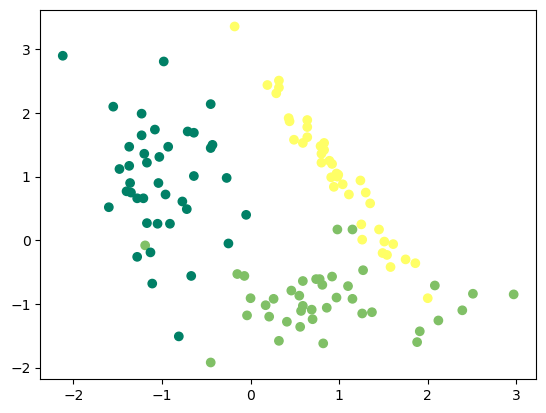

In [36]:
# y == label (label에 따라 색 분류)
plt.scatter(X1, X2, c=y, cmap='summer')
plt.show()

### 분류 => DT

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 2), (30, 2), (90,), (30,))

### 모델 생성

In [84]:
model = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)

In [85]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10)

In [86]:
model.score(X_train, y_train)

# 1이면 과대적합

0.9444444444444444

In [87]:
model.score(X_test, y_test)

0.9

C:\Users\user\AppData\Local\Temp\ipykernel_9148\2639650075.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


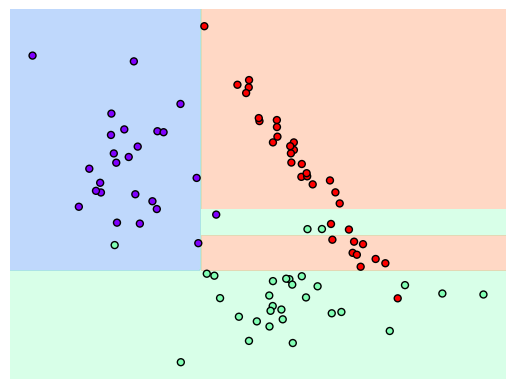

In [88]:
# 시각화
visualize_boundary(model, X_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_9148\2639650075.py:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


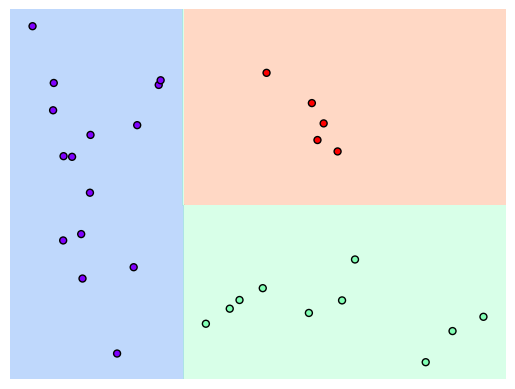

In [89]:
visualize_boundary(model, X_test, y_test)